In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

from scipy.stats import norm
from scipy.optimize import curve_fit

%matplotlib inline

DEBUG = False;

# Define Gaussian function
def gaussian(x, mu, sigma,A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

## Ratios

In [3]:
# WEEK="APSAIA_VUV_2";
# WEEK="DAPHNE_VUV";OV=12


plt.figure(dpi=200)



for WEEK,counter in zip(["APSAIA_VUV","APSAIA_VUV_2","DAPHNE_VUV"],[1,2,3]):
    z=0;
# for WEEK in ["DAPHNE_VUV"]:
# for WEEK in ["APSAIA_VUV_2"]:
# for WEEK in ["APSAIA_VUV"]:

    compress=False

    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")

    ovs=[2 , 2.5, 3]
    if WEEK=="DAPHNE_VUV":ovs=[7,9,12]
    
    for OV in ovs:
        
        for run in Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]["Run"]:
        # run=Runs.iloc[5]["Run"]

            print(run)
        # def charge_ratio(charge):
        #     SiPMs_12=(charge[0]+charge[1])
        #     SiPMs_34=(charge[2]+charge[3])
        #     return SiPMs_12/SiPMs_34

            # for chargemode in ["ChargeRange"]:
            for chargemode in ["PeakFinderInRange"]:
                charge =[]
                charge2=[]

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

ovs=[2 , 2.5, 3]
if WEEK=="DAPHNE_VUV":ovs=[7,9,12]

for OV in ovs:
    
    for run in Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]["Run"]:

                q_cut=Charge_vars[chargemode]*ADCsxticks2PE>2
                
                CUT=ped_cut*amp_cut
                hist, bins = np.histogram(Charge_vars[chargemode]*ADCsxticks2PE,100,[0,40])

                # popt, _ = curve_fit(gaussian, bins[:-1], hist,[16,5,852])
                
                # plt.hist(Charge_vars[chargemode][CUT],100,[0,.4e5],alpha=.5,histtype="step",linewidth=2)

                charge.append(np.mean(Charge_vars[chargemode][CUT]*ADCsxticks2PE))
                charge2.append(popt[0])

                # plt.legend()
                # print(chargemode)
                # print(charge_ratio(charge ))
                # print(charge_ratio(charge2))    
                
                # plt.legend(["0","1","2","3"])
                
                if (counter==1):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),".",color="tab:green" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),".",color="tab:green")
                if (counter==2):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"s",color="tab:orange" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"s",color="tab:orange")
                if (counter==3):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"x",color="tab:blue" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"x",color="tab:blue")
                z=1
                # plt.plot(run,(charge[1])/(charge[3]),"x")
                # plt.plot(run,(charge[1])/(charge[2]),"s")
        
        
plt.legend()
# plt.xlim([0,1])
plt.ylim([.8,1.2])
plt.grid()
plt.xlabel("run")

0
1
10
11
32
33
2
3
12
13
34
35
4
5
14
15
36
37
0
1
10
11
32
33
51
2
3
12
13
34
35
52
4
5
14
15
36
37
53


NameError: name 'Charge_vars' is not defined

<Figure size 1200x800 with 0 Axes>

## Ch0

1
18.997507870505352


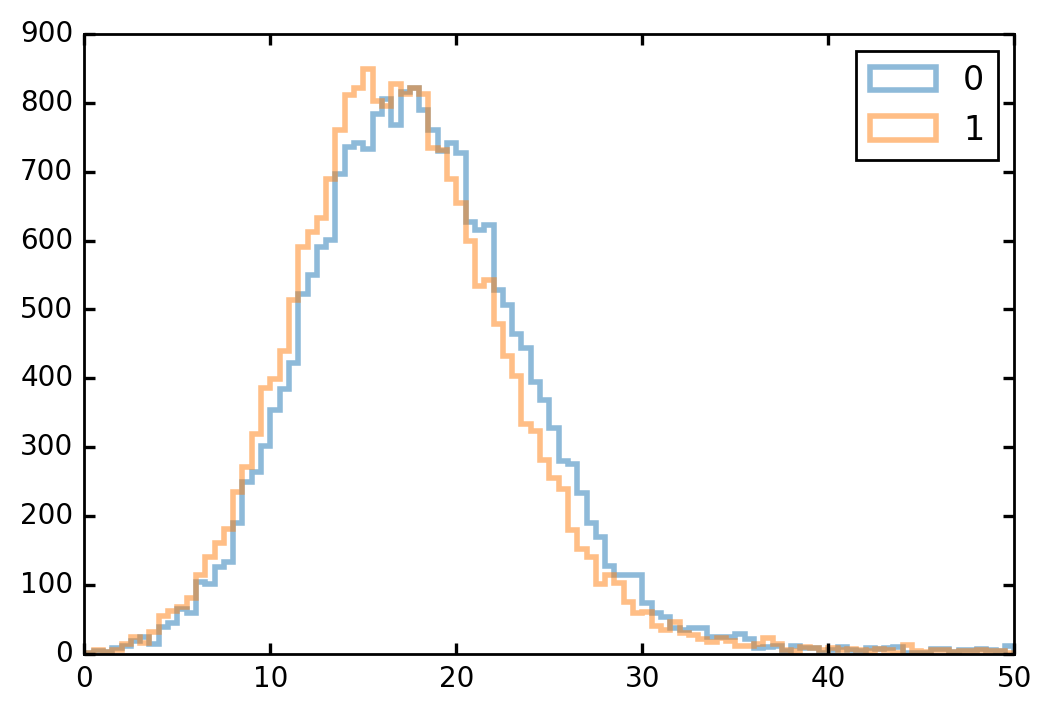

In [2]:
import uproot


file=uproot.open("npy_filess/192k_ev_100k_evs.root")

sensor=file["Hits"]["fsensor"] .array()
nhits =file["Hits"]["acumHits"].array() 


WEEK="APSAIA_VUV_2";OV=4
WEEK="DAPHNE_VUV"  ;OV=4

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
compress=False

aux_charge=[]
aux_cut=[]

for run in [Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageSiPMs"]==OV)]["Run"][1]]:
    print(run)
    #  Data

    # for chargemode in ["ChargePeakRange","ChargeRangeAverageWvf","ChargeRange","ChargeRangeRelativeAmp"]:
    for chargemode in ["ChargeRange"]:
        
        plt.figure(dpi=200)
        for ch in [0,1]:
            
            if ch<3:ADCsxticks2PE=GetGains(WEEK,ch,OV)
            else   :ADCsxticks2PE=GetGains(WEEK,ch-1,OV)

            run_path=path+"run"+str(run).zfill(2)+"/";
            Charge_vars     =open_ch_var(run_path ,"Charge_vars" ,ch,compressed=compress)
            Peak_vars       =open_ch_var(run_path ,"Peak_vars"   ,ch,compressed=compress)
            Pedestal_vars   =open_ch_var(run_path ,"Pedestal_vars"   ,ch,compressed=compress)
            
            ped_cut=Pedestal_vars["STD"]<(np.mean(Pedestal_vars["STD"])+2*np.std(Pedestal_vars["STD"]))
            amp_cut=Peak_vars["Peak"]>70
            CUT=ped_cut*amp_cut
            
            hist_DATA=plt.hist(Charge_vars[chargemode][CUT]*ADCsxticks2PE,100,[0,50],alpha=.5,histtype="step",linewidth=2,label=ch)
            
            aux_charge.append(Charge_vars[chargemode]*ADCsxticks2PE)
            aux_cut   .append(CUT)
            
    print(np.mean(Charge_vars[chargemode][CUT]*ADCsxticks2PE) )
plt.legend()
    
    

# #  MC
# aux_binom=np.zeros(nhits[sensor==1].shape[0])

# MC=nhits[sensor==1]
# weights=len(Charge_vars[chargemode][CUT])/len(MC)*np.ones(len(MC))

# print(np.mean(MC))
# efficiency=0.1
# aux_poiss=np.zeros(MC.shape[0])
# z=0
# for nphot in MC:
    
#     # ## binomial distribution for each photon. 1=detected, 0=not detected
#     # dice=np.random.uniform(0,1,int(nphot)) 
#     # aux_poiss[z]=np.sum(dice<efficiency)

#     ## poisson distribution, faster but less accurate for low number of photons (the tails are not well reproduced)
#     lambda_ = efficiency * nphot
#     aux_poiss[z]   =np.random.poisson(lambda_)
#     z+=1;

# MC=aux_poiss

# elec_smear=0.15
# MC*=np.random.normal(1, elec_smear, int(MC.shape[0]))

# plt.hist(aux_poiss,100,[0,50],alpha=.5,histtype="step",linewidth=2,weights=weights/1.1);


# print(np.mean(aux_poiss))

# plt.yscale("log")
# plt.yscale("linear")
# plt.legend(["Data"," MC"])
# plt.semilogy()

In [13]:
peaks

(array([18]),
 {'peak_heights': array([869.]),
  'prominences': array([724.]),
  'left_bases': array([0]),
  'right_bases': array([39]),
  'widths': array([20.11111111]),
  'width_heights': array([507.]),
  'left_ips': array([8.77777778]),
  'right_ips': array([28.88888889])})

34.90713996643145

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 160.2 (chi2/ndof = 1.7)    │              Nfcn = 99               │
│ EDM = 5.01e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   35.06   │   0.06    │            │            │         │         │       │
│ 1 │ sigma │   7.78    │   0.04    │            │            │         │         │       │
│ 2 │ A     │    488    │     4     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        A │
├───────┼────────────────────────────┤
│    mu │  0.00302 0.000139  -0.0107 │
│ sigma │ 0.000139  0.00197   -0.118 │
│     A │  -0.0107   -0.118     18.4 │
└───────┴────────────────────────────┘

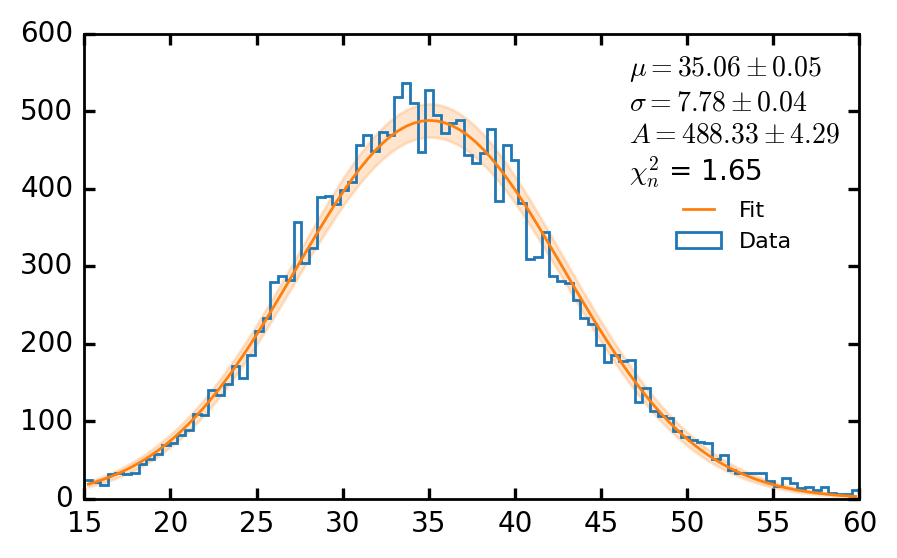

In [161]:
from lmfit.models import GaussianModel
from iminuit import cost
from iminuit import Minuit
from numba_stats import norm, t
from jacobi import propagate

plt.figure(dpi=200,figsize=(5,3))


Bins=100
R   =[15,60]
plt.hist    (aux_charge[1][aux_cut[0]*aux_cut[1]]+aux_charge[0][aux_cut[0]*aux_cut[1]],Bins,R,label="Data",histtype="step")
counts,bins=np.histogram(aux_charge[1][aux_cut[0]*aux_cut[1]]+aux_charge[0][aux_cut[0]*aux_cut[1]],Bins,R)

peaks=find_peaks(counts,height=800,width=4)

# popt, _ = curve_fit(gaussian, bins[:-1]+(bins[1]-bins[0])/2, counts,[16,5,852])

ydata=counts
xdata=bins[:-1]+(bins[1]-bins[0])/2


# Lmfit
# model = GaussianModel()
# params = model.guess(ydata, x=xdata)
# result = model.fit  (ydata, params, x=xdata)

# print(f'Chi-square = {result.chisqr:.4f}, Reduced Chi-square = {result.redchi:.4f}')
# print(result.fit_report())

# plt.plot(xdata, result.best_fit, label='best fit')

# fit_y=gaussian(bins[:-1]+(bins[1]-bins[0])/2,*popt)
# plt.plot(bins[:-1]+(bins[1]-bins[0])/2,fit_y)
# plt.semilogy()
# plt.ylim(0.5,1.2e3)
# popt

c = cost.LeastSquares(xdata, ydata, np.sqrt(ydata), gaussian)

m = Minuit(c, *(35,7,800))

m.migrad()
plt.plot(xdata, gaussian(xdata, *m.values), label="Fit")
m.hesse()

plt.legend()

plt.legend(    frameon=False,       title=f"$\mu = {m.values[0]:.2f} \pm {m.errors[0]:.2f}$\n"
                 f"$\sigma = {m.values[1]:.2f} \pm {m.errors[1]:.2f}$\n"
                 f"$A = {m.values[2]:.2f} \pm {m.errors[2]:.2f}$\n"
                 f'$\chi^2_n $ = {m.fval/m.ndof:.2f}'
         ,fontsize=8);

# Errorbands
y, ycov = propagate(lambda p: gaussian(xdata,  *p), m.values, m.covariance)
yerr_prop = np.diag(ycov) ** 0.5

plt.fill_between(xdata, y - yerr_prop*5, y + yerr_prop*5, alpha=0.2,color="tab:orange")
# plt.plot(xdata, y - yerr_prop*5,', alpha=0.5,color="tab:orange")
# plt.plot(xdata, y + yerr_prop*5,', alpha=0.5,color="tab:orange")

m